# All About Logistic Regression

- unlike linear and multilinear regression this type of regression doesn't lie on straight line
- it displays a S-shape lined structure which is also called s-function
- s-function works on the basis of probability
- probability runs through maximum likelihood method
- if we have two parameters that's why it is used for classification
- but for regression we should have more than 2 values
- logistic regression tells us the probability

# Linear Regression Vs Logisitc Regression

- Linear Regression
  - How the line fits 
    - (least square)
    - minimizing the MRE
  - R2 tells us the accuracy

- Logistic Regression
  - How the line fits
    - It uses probabilty

In [112]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
# import online data
from sklearn.datasets import load_digits

digits = load_digits()

In [114]:
# data has input variables/features
digits.data.shape
# 1797(rows) of images with size 64(8x8)

(1797, 64)

In [115]:
# output labels
digits.target.shape

(1797,)

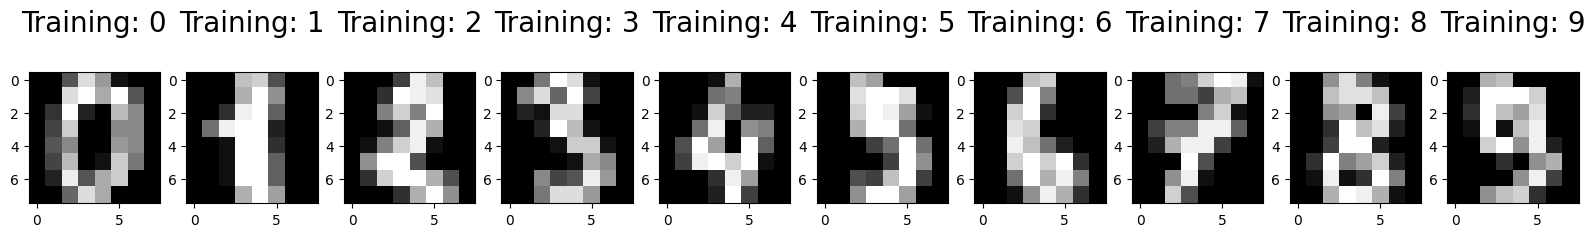

In [116]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(1, 10, index+1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [117]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [118]:
print('Trained input data: ', x_train.shape)
print('Test input data: ', x_test.shape)
print('Trained output data: ', y_train.shape)
print('Test output data: ', y_test.shape)

Trained input data:  (1617, 64)
Test input data:  (180, 64)
Trained output data:  (1617,)
Test output data:  (180,)


In [119]:
# model train
from sklearn.linear_model import LogisticRegression

log_Regr = LogisticRegression().fit(x_train, y_train)
log_Regr

c:\Users\stech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
log_Regr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [121]:
# accuracy test
score = log_Regr.score(x_test, y_test)
print('The accuracy testing score is: ', score)
# 0.9611111111111111

The accuracy testing score is:  0.9611111111111111


In [122]:
#confusion matrix
import seaborn as sns
from sklearn import metrics

predictions = log_Regr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(predictions.shape)
print(cm)

(180,)
[[11  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  2]
 [ 0  1  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  1  0  0 19  0  0]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  1  0  0  1 22]]


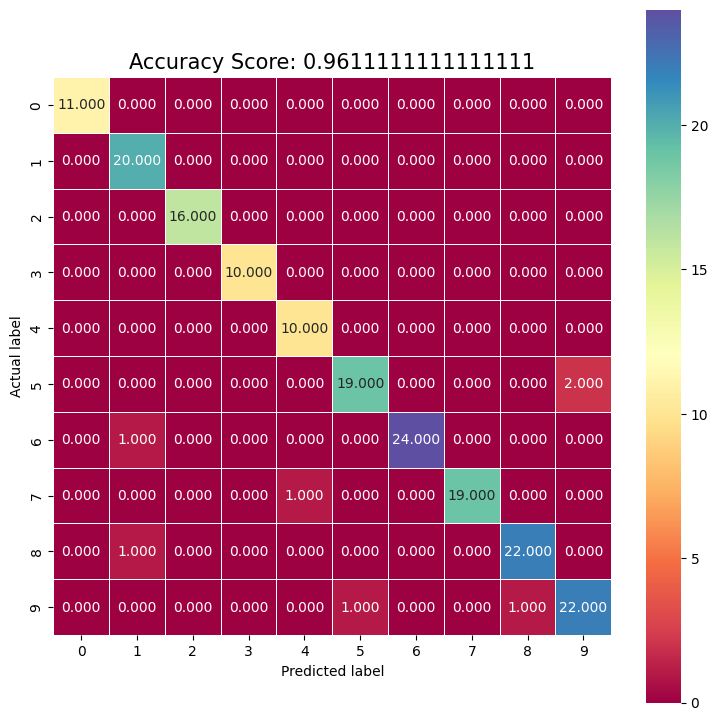

In [123]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Spectral');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [124]:
# get the misclassified values

index = 0
misclassifiedIndexes = []
for actual, predict in zip(y_test, predictions):
 if actual != predict: 
  misclassifiedIndexes.append(index)
 index +=1

In [125]:
misclassifiedIndexes

[56, 84, 90, 94, 118, 124, 130]

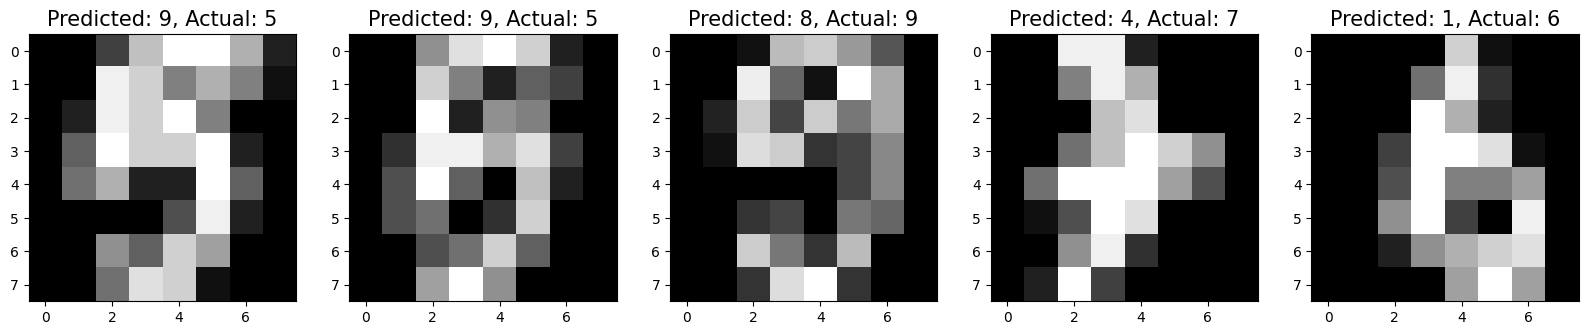

In [126]:
# Plotting misclassified values with known labels

plt.figure(figsize=(20, 4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)